In [1]:
import AlgPoly as ap
import numpy as np
import PolyNN
import matplotlib.pyplot as plt

We will train the following (very simple) polynomial network. This will amount to do a polynomial regression.

In [2]:
net = PolyNN.PolyNN([1,1],PolyNN.identity,[2],damping=3)

net will learn to be the following polynomial P :

In [3]:
#P=2X^2 + 3X +1
P = ap.Polynomial({():1, (0,):3 , (0,0) : 2})

Creating a training data : 

In [4]:
training_data = []
for i in range(10000):
    x =  np.random.rand(1)
    y = P.raw_evaluate(x)
    #we add some random errors on the output
    y += np.random.normal(0,0.1)
    training_data.append((x,y))

Use the training data to train net :

In [5]:
for (x,y) in training_data:
    net.steplearning(x,y,1.0)

Let's plot our training data (blue points) and see what our network predicts now that it is trained (red curve)

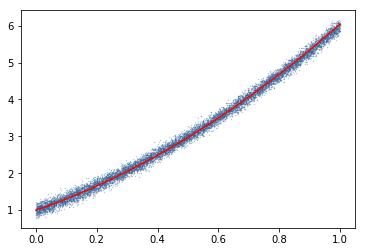

In [7]:
training_x = [x for (x,y) in training_data]
training_y = [y for (x,y) in training_data]
t = np.linspace(0,1,1000)
network_predictions = [net.feedForward(np.array([x])) for x in t]
plt.scatter(training_x,training_y,s=0.1,c=(0.2,0.4,0.6,0.5)) #a scatter view of our training set
plt.plot(t,network_predictions,'r')
plt.show()